# Importing Libraries

In [1]:
import Network
import Learning
import matplotlib.pyplot as plt
import numpy as np
import Snake_Engine

# Setting up Loss function

In [2]:
def lossFunction(net):
    
    runs = 100
    games = [Snake_Engine.Board() for i in range(runs)]

    while all_end(games) == False:
        inputs = [game.get_inputs() for game in games]
        #for input in inputs:
            #print(np.shape(input))
        #print(np.shape(inputs),'asa')
        outputs = net.forward(inputs)

        for i in range(runs):
            if games[i].end: #if game has ended
                pass
            else:
                move = np.argmax(outputs[i])
                games[i].push(move)

    total_points = 0
    for game in games:
        total_points = total_points + game.food_points + game.move_points

    return 1/(total_points/runs)
            


def all_end(games): #checks if all games have ended
    for game in games:
        if game.end == True:
            pass
        else:
            return False
    return True

    

# Creating Network

In [3]:
test_net = Network.network(24,4)
test_net.add_layer(Network.layer_dense(24,4))
test_net.add_layer(Network.softmax())

lossFunction(test_net)

0.02702702702702703

In [4]:
losses,data = Learning.random_learning(test_net,lossFunction,max_mutations = 1000,threshold = 1e-7,info=True)
print(data[1])

Iter 0 Loss 0.037037037037037035
Iter 1 Loss 0.026702269692923896
Iter 2 Loss 0.0211954217888936
Iter 3 Loss 0.003460686600221484
Iter 4 Loss 0.003155868337172973
Iter 5 Loss 0.003052782611350246
Iter 6 Loss 0.0028011989131348216
Iter 7 Loss 0.002799316966660135
Iter 8 Loss 0.002650902632346314
Iter 9 Loss 0.0026504108136761197
Iter 10 Loss 0.002518574486840448
Stopped Due to Max Mutations Reached
1967


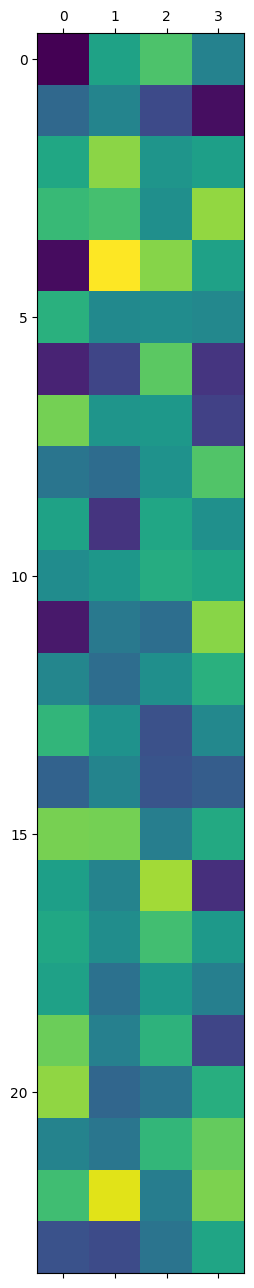

In [5]:
plt.matshow(test_net.layers[0].weights)

In [7]:

game = Snake_Engine.Board()
while game.end == False:
    game.push(np.argmax(test_net.forward([game.get_inputs()])))
    print(game)

X X X X X X X X X X X X X X X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X             B H         F X 
X             B             X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X X X X X X X X X X X X X X X 
X X X X X X X X X X X X X X X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X             B B H       F X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X X X X X X X X X X X X X X X 
X X X X X X X X X X X X X X X 
X                           X 
X       